# TME 8 & 9 : Reconnaissance de Visages par Eigenfaces

**L'objectif du TME est d'étudier les propriétés de la méthode de reconnaissance de visages Eigenfaces.**

On développera un système capable:

-   d'identifier un visage parmi une base de données de visages de
    référence

-   de déterminer si une image contient un visage présent dans la base
    de données

-   de reconnaître si une image représente un visage ou non

On appliquera les outils développés sur la base de visages Yale Faces Database.

## Principe général

Le problème de la reconnaissance de visages est défini comme suit :
étant donnée une image de visage, on souhaite déterminer l'identité de
la personne correspondante. Pour ce faire, il est nécessaire d'avoir des
images de référence, sous la forme d'une base de données de visages de
toutes les personnes connues par le système. À chaque visage est associé
un vecteur de caractéristiques. Ces caractéristiques sont supposées être
invariantes pour une même personne, et différentes d'une personne à
l'autre. La reconnaissance consiste alors à comparer le vecteur de
caractéristiques du visage à reconnaître avec celui de chacun des
visages de la base. Ceci permet de retrouver la personne ayant le visage
le plus ressemblant, qui est celui dont le vecteur est le plus
similaire.

Il existe plusieurs types de méthodes, qui se distinguent par le type de
caractéristiques utilisées, voir _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces : A survey. Proceedings of the IEEE, 83(5), 1995_ pour un état de
l'art:

-   Les approches par modèles de visage procèdent à une analyse
    biométrique des visages pour déterminer des mesures telles que la
    distance entre les yeux, la longueur du nez, la forme du menton\...

-   Les approches image comparent au contraire directement les visages,
    en les considérant comme des images, pour lesquelles des mesures de
    similarité pré-attentives (sans modèle a priori) sont définies.

-   Des approches hybrides utilisent les notions de similarité entre
    images, mais en rajoutant des connaissances a priori sur la
    structure d'un visage.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: Principe général d'un système de reconnaissance de visages</center>


## Analyse par Eigenfaces

La reconnaissance de visages par Eigenfaces est une approche de type
image. Chaque image de visage est considérée comme un vecteur dans un
espace ayant autant de dimensions que de pixels dans l'image. Les
caractéristiques de l'image sont extraites par une méthode mathématique
de réduction de dimensionnalité basée sur l'analyse en composante
principales (ACP). Cette approche a été originellement proposée en 1991, voir
_M. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71–86, 1991_.

Dans la suite, nous utiliserons la notation italique pour désigner les
scalaires ($m, K,\dots$) et les vecteurs ($x, u$), ainsi que le gras
pour les matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

On note $x$ les images des visages, resprésentées comme un vecteur à $d$
composantes, et $x[i] (i=0,\cdots,d-1)$ le pixel numéro $i$ de cette image. Un
ensemble de visages forme donc un nuage de points dans
$\mathbb{R}^d$. On note $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ l'image du
visage de référence numéro $k$, et $x_k^{test}$ $(k=0,\cdots,N_{test}-1)$
l'image du visage de test numéro $k$.

On note $x_{moy}$ la moyenne des visages de référence, ou visage moyen.
Le principe de la méthode des Eigenfaces est de modéliser la différence
d'un visage quelconque par rapport à ce visage moyen par un ensemble
limité d'images $u_h$, appelées Eigenfaces. Une image
de visage $x \in \mathbb{R}^d$ est donc exprimée comme le visage moyen
auquel s'ajoute une combinaison linéaire d'eigenfaces :

$$x = x_{moy} + \sum_h a_h u_h + \varepsilon$$

où $a_h$ représente le poids de *l'eigenface* d'indice $h$ dans le
visage $x$, et $\varepsilon$ représente l'erreur entre $x$ et son
approximation par les eigenfaces. Les coefficients $a_h$ jouent un rôle
très important pour la reconnaissance des visages, car ils correspondent
aux coordonnées du visage $x$ dans le sous-espace des visages.

La méthode des Eigenfaces repose sur le fait que le nombre d'eigenfaces
considérées est bien inférieur à la dimension totale de l'espace, ce que
l'on appelle réduction de dimensionnalité . Les images sont donc
analysées dans un sous-espace de dimension réduite, qui représente plus
spécifiquement les visages, parmi tous les types d'images possibles.

Le visage moyen étant toujours le même pour une base de référence fixée,
nous considérerons dans la suite systématiquement chaque visage sous sa
forme centrée, c'est-à-dire après soustraction du visage moyen.

## Base de données de visages

On va ici utiliser la base d'images "Yale Faces" 
(http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html).
Dans cette base, les visages ont tous été traités, afin de les recaler et rogner à la taille
$64 \times 64$ pixels, de sorte que les images puissent être comparées
pixel à pixel.

Cette base contient 120 images en niveaux de gris, représentant les
visages de 15 individus. Il y a 8 images par individu, chacune
correspondant à une catégorie d'images variant selon les critères
suivants (figure 2):

-   variation de l'expression du visage: normal, sad, sleepy, surprised,
    wink, happy

-   variation des accessoires: glasses, noglasses,


![database.png](./figs/Figure_2.png)
<center>Figure 2: illustration des catégories de prise de vue</center>


La base d'images est divisée en deux groupes : l'un des groupes va être
utilisé comme jeu d'entrainement, l'autre groupe comme jeu de test.

La base de référence contient $n$ images, chacune ayant un nombre de
pixels $d=n_l\cdot n_c$. Pour l'instant, on a $6$ images par catégorie
dans la base d'entrainement, d'où $n=6\times15=90$. Chaque image est de
taille $64\times64$, d'où $d=4096$.

Dans la suite, nous manipulerons toujours les images de visage sous la
forme de vecteurs, et un ensemble de visages sous la forme d'une matrice
dont chaque colonne est un visage. Sous Numpy, les images seront
stockées dans des matrices de réels (double). En général, les images
seront stockées dans une matrice $\mathbf X$ de taille $d\times n$ :
$$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$

Cette matrice sera déclinée en $\mathbf X^{train}$ et $\mathbf X^{test}$
de tailles $d\times N_{train}$ et $d\times N_{test}$.

# Exercice 1 : chargement de la base, affichage et centrage des visages

On utilisera aussi les vecteurs $id$ et $cat$, qui contiennent des
informations sur le contenu des images ($id[k]$ et $cat[k]$ sont
respectivement l'indice de l'individu de l'image $k$, et la catégorie à
laquelle appartient l'image). Encore une fois ces vecteurs existeront
pour *train* et pour *test*.


Pour charger les images, on chargera simplement le fichier de données
Matlab `YaleFaces.mat` que vous trouverez à côté de ce fichier Notebook.
Il fournit les matrices et vecteurs
$\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

Le code suivant charge la base et créé les différentes matrices et vecteurs correspondants

In [1]:
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

# Chargement de la base YaleFaces
import scipy.io
yaleFaces = scipy.io.loadmat('./YaleFaces.mat')
# entraînement (90 visages)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]  # cat[k]: catégorie de l'image
id_train = yaleFaces['id_train'][0]-1  # id[k]: indice de l'individu
# test (30 visages)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]  # idem
id_test = yaleFaces['id_test'][0]-1  # idem
# non-visages
X_noface = yaleFaces['X_noface']

In [2]:
print(id_train)
print(id_test)
# Plusieurs images de chaque personne (il y en a 15), dans différentes situations, partagées entre le train et le test.

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14]


In [3]:
print(np.unique(cat_train))
print(np.unique(cat_test))
# Les huit situations en question.

[array(['glasses'], dtype='<U7') array(['happy'], dtype='<U5')
 array(['noglasses'], dtype='<U9') array(['normal'], dtype='<U6')
 array(['sad'], dtype='<U3') array(['sleepy'], dtype='<U6')
 array(['surprised'], dtype='<U9') array(['wink'], dtype='<U4')]
[array(['glasses'], dtype='<U7') array(['happy'], dtype='<U5')
 array(['noglasses'], dtype='<U9') array(['normal'], dtype='<U6')
 array(['sad'], dtype='<U3') array(['sleepy'], dtype='<U6')
 array(['surprised'], dtype='<U9') array(['wink'], dtype='<U4')]


In [4]:
# Pour un affichage plus lisible.
def afficheImages(images,titles):
    plt.figure(figsize=(20,len(images)))
    cpt=1
    for i in range(len(images)):
        plt.subplot(int(np.ceil(len(images)/5)),5,cpt)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
        cpt += 1
    plt.show()
    
# Fonction originale.
def afficheImage(image,title=None):
    plt.figure(figsize=(3,3))
    plt.gray()
    plt.imshow(image)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

1.  Mettre au point une fonction pour calculez le visage moyen
    $x_{moy}$. Indication: utiliser la fonction `mean` de Numpy.

In [5]:
def meanFaces(X):
    # Calcul du visage moyen.
    return np.array(X).mean(axis=0)

2.  Mettre au point une fonction pour centrer les visages.

In [6]:
def centeredFaces(X):
    # Le centrage est un recalage par rapport au visage moyen, qui demeure bien sûr le même pour toute la base.
    # On cale ainsi correctement les images dans un repère défini comme étant un sous-espace de *visages* :
    # on récupère par soustraction la distance à l'"origine".
    # Ce calcul prépare la création des eigenfaces dont chaque visage sera vu comme une combinaison linéaire.
    m = meanFaces(X)
    return np.array([x - m for x in X])

3. Mettre au point une fonction `deflat()` qui prend un visage, réprésentée sous la forme d'un vecteur de 64 éléments, et retourne une image de taille $64\times 64$. La base Yale Faces a été créé sous Matlab, pour lequel les matrices sont organisées colonnes par colonnes. Il pourra être utile de transposer.

In [7]:
def deflat(V):
    # Réaligner les pixels sous une forme carrée pour l'affichage.
    return V.reshape((64,64)).T

4.  Charger la base d'images, affichez le visage moyen, ainsi que quelques visages accompagnés des visages centrés associés. Voici un exemple de résultat attendu :
![Figure_1.png](./figs/Figure_3.png)
<center>Figure 3: visage moyen et centrage de la base</center>

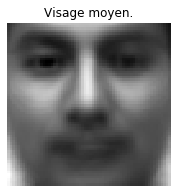

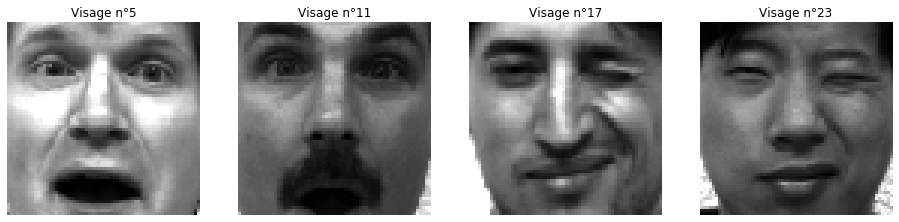

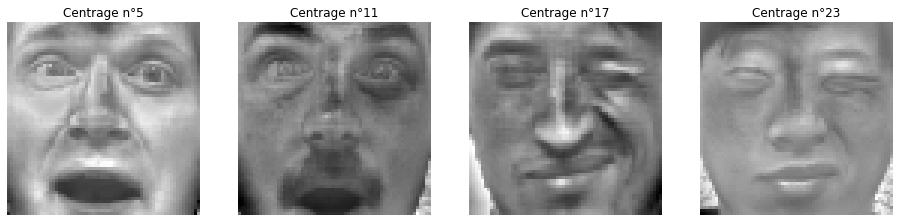

In [8]:
# Traitement (centrage) de quatre visages.
index = np.array([5,11,17,23])
mean = meanFaces(X_train.T)
faces = centeredFaces(X_train.T)
# Affichage du visage moyen de la base. 
afficheImage(deflat(mean),"Visage moyen.")

# Récupérer et afficher la liste de visages non traités.
images = []
titles = []
for i in index:
    images.append(deflat(X_train.T[i]))
    titles.append("Visage n°"+str(i))
afficheImages(images,titles)
# Récupérer et afficher la liste de visages centrés.
images = []
titles = []
for i in index:
    images.append(deflat(faces[i]))
    titles.append("Centrage n°"+str(i))
afficheImages(images,titles)

# Exercice 2 : Calcul des Eigenfaces (ACP)

La méthode développée par Turk et Pentland définit les
eigenfaces comme les axes principaux obtenus en effectuant une analyse en
composantes principales (ACP) des vecteurs associés aux visages de référence.
**Les eigenfaces sont ainsi les vecteurs propres de la matrice de
covariance $\mathbf X_c\mathbf X_c^\top$**, de taille
$d\times d$, où la matrice $\mathbf X_c$ de même taille que $\mathbf X$
représente l'ensemble des visages centrés :
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$ Chaque
ligne de $\mathbf X_c$ correspond à un pixel $p$, chaque colonne de
$\mathbf X_c$ correspond à un visage de référence de numéro $k$.

Plutôt que d'utiliser la décomposition en valeurs propres, nous
utiliserons la décomposition en valeurs singulières (DVS, ou singular
value decomposition, SVD en anglais). La DVS décompose la matrice
$\mathbf X_c$ de taille $d\times d$ en 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ telles que :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

où $\mathbf U$ et $\mathbf V$ sont orthonormales
($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ et
$\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$)
de tailles respectives $d\times d$ et $n\times n$, et $\mathbf S$ est une
matrice $d\times n$ nulle partout sauf sur la diagonale principale.

Cette décomposition présente les propriétés suivantes :

-   les colonnes de $\mathbf V$ sont les vecteurs propres de
    $\mathbf X_c^\top\mathbf X_c$

-   les colonnes de $\mathbf U$ sont les vecteurs propres de
    $\mathbf X_c\mathbf X_c^\top$

-   la diagonale de $\mathbf S$ contient les valeurs singulières de
    $\mathbf X_c$, égales au carré des valeurs propres
    $\lambda_k$ de $\mathbf X_c^\top\mathbf X_c$ et
    $\mathbf X_c\mathbf X_c^\top$

Sous Numpy, la Décomposition en Valeurs Singulières peut-être calculée
par la commande :

`U, S, V = numpy.linalg.svd(Xc)`

Dans notre cas, $n<d$, et les valeurs propres $\lambda_k$ de
$\mathbf X_c\mathbf X_c^\top$ sont donc toutes nulles pour $k>n$.
Nous n'aurons pas besoin des vecteurs propres associés $k>n$. La
fonction `svd` possède un mode économique, qui ne calcule que les vecteurs
propres correspondant aux colonnes de la matrice passée en argument :

`U, S, V = svd(Xc, full_matrices=False)`

Cette commande renvoie des matrices $\mathbf U$ et
$\mathbf V$ de taille $d\times n$, $n\times n$ et la
matrice $\mathbf U$ a été tronquée à ses $n$ premières colonnes:
$$\mathbf U= \left[ u_1, ..., u_n\right]$$
Enfin `S` est un vecteur de taille $n$ et représente de façon économique 
la matrice $\mathbf S$ diagonale.

1.  Mettre au point une fonction `eigenfaces(Xc)`, qui à
    partir des images centrées de la base d'entraînement calcule t-uple constitué de
    la matrice $\mathbf U$ des eigenfaces et d'un tableau des valeurs propres associés.
    Vous normaliserez les valeurs propres pour que leurs somme soit égale à 1.
    
    Utilisez ensuite cette fonction pour calculer $\mathbf U$ et `lambda`
    

In [9]:
def eigenfaces(Xc):
    # Usage de la SVD (Singular Value Decomposition).
    U, S, V = numpy.linalg.svd(Xc.T, full_matrices = False) 
    # S récupère les valeurs propres, U les vecteurs propres qui nous intéressent.
    # Normaliser les valeurs propres.
    S = (S**2)/np.sum(S**2) 
    return U.T, S

3.  Affichez le visage moyen et les 15 premières eigenfaces (voir figure 4, utiliser la fonction `plt.subplot()`)
    et leurs valeurs propres associées. Quelle est l'interprétation de l'image des eigenfaces ?

![Figure_2.png](./figs/Figure_4.png)
<center>Figure 4: les 15 premières eigenfaces</center>

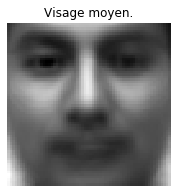

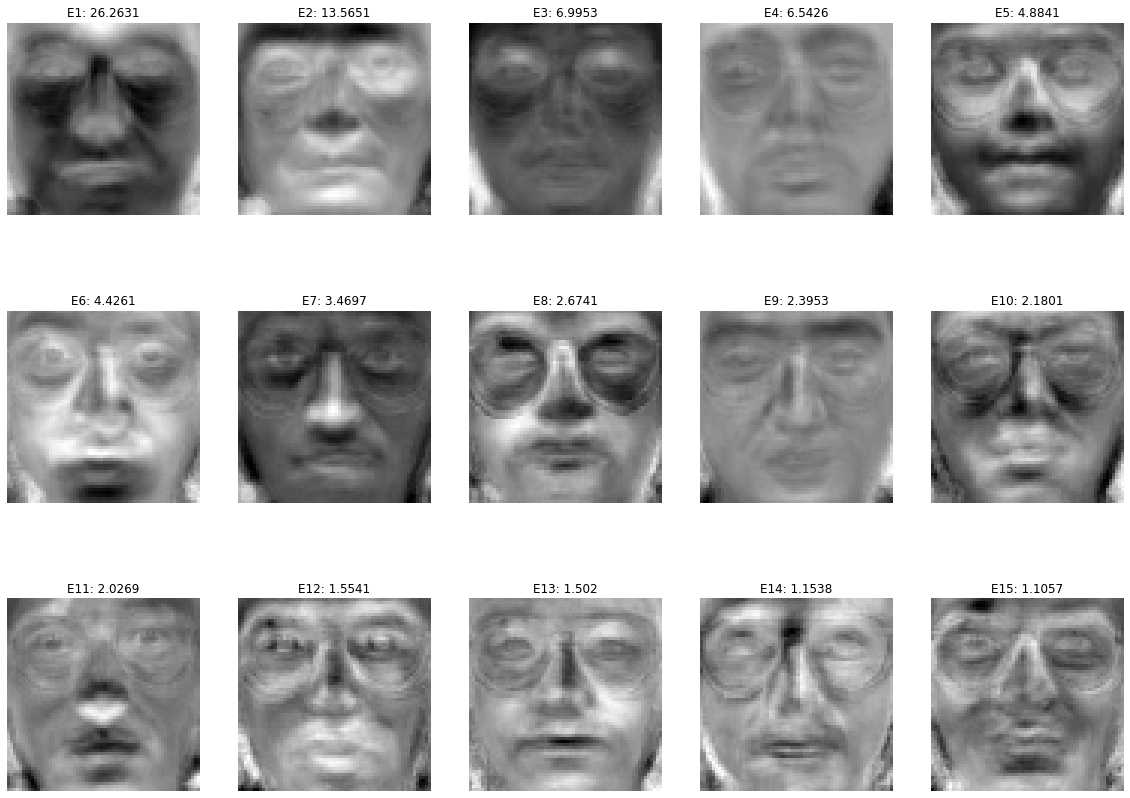

Somme des valeurs propres liées aux eigenfaces : 1.0000000000000002


In [10]:
# Affichage du visage moyen.
afficheImage(deflat(mean),"Visage moyen.")

# Calcul des eigenfaces.
faces = centeredFaces(X_train.T)
U,S = eigenfaces(faces)

# Traitement pour l'affichage
index = np.arange(0,15,1)
images = []
titles = []
for i in index:
    images.append(deflat(U[i]))
    titles.append("E"+str(i+1)+": "+str(np.around(100*S[i],4))) 
    # La multiplication permet de représenter les valeurs propres comme des "pourcentages de participation" dans le modèle. 
afficheImages(images,titles)

# Les valeurs propres sont censées sommer à 1.
print("Somme des valeurs propres liées aux eigenfaces :",np.sum(S))

4.  Tracer la courbe de la somme cumulée des valeurs propres normalisées
    (figure 5), afin de voir combien de variation
    est capturée par les $K$ premières eigenfaces. Combien d'eigenfaces
    sont nécessaires pour obtenir une bonne reconstruction ?
    
    
![Figure_3.png](./figs/Figure_5.png)
<center>Figure 5: somme cumulées des valeurs propres</center>

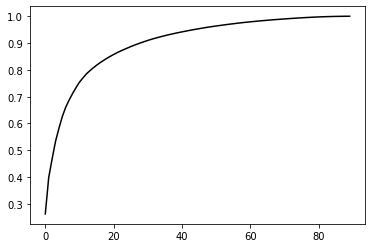

In [11]:
# Somme cumulée des valeurs propres.
s = S.cumsum()
plt.figure()
plt.plot(s, color='black')
plt.show()

# On retrouve bien la somme à 1 sur la fin de la courbe.
# Il sera intéressant de diminuer le nombre d'eigenfaces (90, c'est beaucoup) et donc le temps de calcul,
# sans affecter les performances. Or, on constate que la quantité de "variations capturées" par les eigenfaces 
# croît d'abord très vite avant de se stabiliser, et d'atteindre un point d'inflexion autour de **15**.

# La somme cumulée dépasse alors 80, ce qui est normalement largement satisfaisant au vu du temps de calcul économisé.

# Exercice 3: projection dans le sous-espace des visages

Dans la suite, nous utiliserons un nombre réduit d'eigenfaces afin de
modéliser l'espace de visages représenté sous la forme de la base
$\mathbf W_K$ des $K$ premiers vecteurs propres :

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Notez que les colonnes forment une base orthonormée, donc
$\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

La **projection d'une image dans le sous-espace des visages** se fait
simplement en soustrayant le visage moyen et en effectuant le produit
scalaire de l'image obtenue avec chaque eigenface. Ceci donne les
coordonnées de l'image test dans le sous-espace des visages, qui est de
dimension $K$.

Chaque visage possède donc plusieurs représentations :

-   Son image d'origine, représentée par un vecteur $x$ dans
    $\mathbb{R}^n$

-   Les coordonnées de l'image projetée $z$ dans la base des eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (sous-espace des visages) :
    $$z = \mathbf W_K^\top \times(x-x_{moy})$$

-   Son image reconstruite dans l'espace d'origine $\mathbb{R}^n$,
    $\tilde{x}$ :
    $$\tilde{x} = x_{moy} + \sum_h a_h u_h = x_{moy} + \mathbf W_K \times z$$

**L'erreur de reconstruction est est définie** comme la distance entre
une image et l'image reconstruite associée :
$$E^{recons}(x) =||x-\tilde{x}||_2  = \sqrt{\sum_p \left( x(p) - \tilde{x}(p)\right) ^2}$$

1.  Mettre au point une fonction `projEigenfaces()`, qui à
    partir d'une image $x$ et de l'image moyenne $x_{mean}$ calcule les
    coordonnées $z$ dans le sous-espace $\mathbf W_K$ (tronqué à la
    dimension $K$) des visages.
    

In [12]:
def projEigenface(x, x_moy, W, K):
    # Calcul des coordonnées d'un visage dans un sous-espace à K eigenfaces. Produit scalaire.
    z = np.dot(W[:K], x-x_moy)
    return z

2.  Mettre au point une fonction `reconstruct()`,
    qui à partir d'une image de la projection d'une image dans le
    sous-espace des visage de dimension $K$ calcule les coordonnées de
    l'image projetée dans l'espace $\mathbb{R}^n$ de départ.
    

In [13]:
def reconstruct(z, m, W, K):
    # Refaire le chemin inverse.
    r = m + np.dot(W[:K].T, z)
    return r

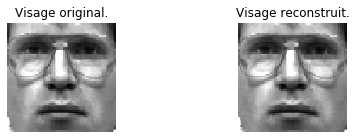

In [14]:
# Phase de test.
z = projEigenface(X_train.T[0], mean, U, len(U))
r = reconstruct(z, mean, U, len(U))

# Traitement pour l'affichage
images = []
titles = []
images.append(deflat(X_train.T[0]))
images.append(deflat(r))
titles.append("Visage original.") 
titles.append("Visage reconstruit.")
afficheImages(images,titles)

# Satisfaisant.

3.  Mettre au point une fonction `errorReconstruct()`,
    qui calcule l'erreur de reconstruction entre $\tilde{x}$ et $x$.

In [15]:
def errorReconstruct(x_r, x):
    # Quantifier la divergence entre la reconstruction et la cible.
    return np.linalg.norm(x-x_r,2)

4.  Mettre au point une fonction `affiche_Reconstruction(x_r,x)`, qui
    affiche l'image initiale et la reconstruction obtenue pour plusieurs
    valeurs de $K$ (par exemple, $K =$ 5, 10, 25, 50, 90).
    

In [16]:
def affiche_Reconstruction(x, m, W, listeK):
    plt.figure(figsize=(20,(len(listeK)+1)))
    # Afficher l'image originale dans la première case de l'affichage.
    plt.subplot(1,(len(listeK)+1),1)
    plt.imshow(deflat(x))
    plt.axis('off') # se débarrasser de l'encadré noir 
    plt.title("Visage original.")
    # Afficher ensuite les images reconstruites.
    n = 2
    for K in listeK:
        # Calcul d'une reconstruction par valeur de K
        z = projEigenface(x, m, W, K)
        r = reconstruct(z, m, W, K)
        e = errorReconstruct(r, x)
        plt.subplot(1,(len(listeK)+1),n) 
        plt.imshow(deflat(r))
        plt.axis('off') 
        # Notation scientifique de l'erreur
        plt.title("{:.2f}".format(e)) 
        n += 1
    plt.show()   

5.  Tester les fonctions précédentes en
    affichant le résultat de la projection/reconstruction pour plusieurs
    images (de la base d'entraînement et de test). La figure 6 montre le résultat de la
    reconstruction pour l'image 50 de la base d'appentissage. Pour
    l'image 55 de la base d'apprentissage, quelle est l'erreur de
    reconstruction pour $K=n=90$ ? L'image est-elle identique à sa
    reconstruction ? Même question pour l'image 17 de la base de test.

![Figure_3.png](./figs/Figure_6.png)
<center>Figure 6: exemple de reconstruction pour l'image 49 d’apprentissage</center>

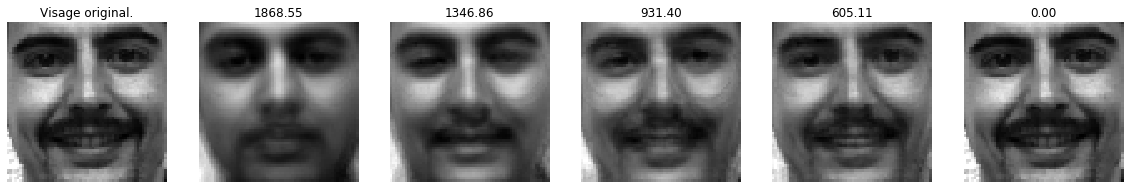

In [17]:
mtest = meanFaces(X_test.T)
mtrain = meanFaces(X_train.T)
listeK = np.array([5,10,25,50,90])

# Visage train n°49.
# apparemment, l'image n°50 au sens de l'énoncé correspond à l'indice 49
# on ignore ce décalage de 1 pour les sous-questions suivantes
affiche_Reconstruction(X_train.T[49],mtrain,U,listeK)

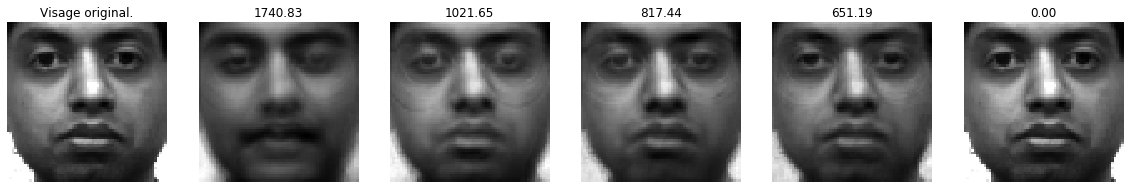

In [18]:
# Visage train n°55.
affiche_Reconstruction(X_train.T[55],mtrain,U,listeK)

# L'erreur finale étant nulle, on se convainc que l'image est identique à sa reconstruction.

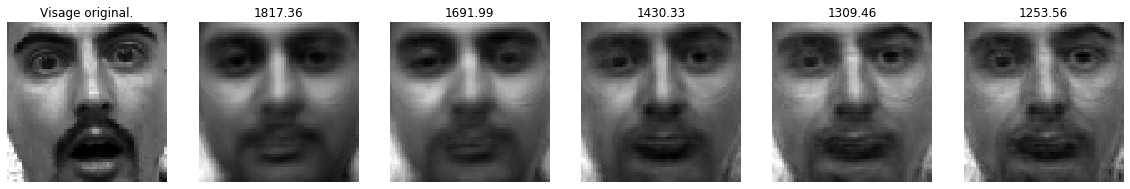

In [19]:
# Visage test n°17.
affiche_Reconstruction(X_test.T[17],mtest,U,listeK)
# Ici, la marge reste très importante, même avec un maximum d'eigenfaces.
# L'image obtenue est donc trop éloignée de l'original.

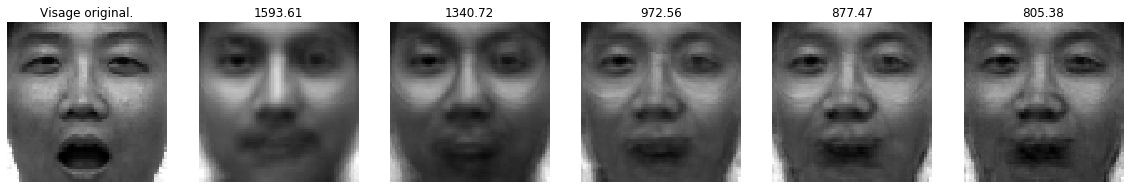

In [20]:
# Visage test n°27.
affiche_Reconstruction(X_test.T[27],mtest,U,listeK)

6.  Conclusion : Y a-t-il une différence en terme de reconstruction
    entre les visages issus de la base d'entraînement et ceux issus de
    la base de test ? Pourquoi ?

La reconstruction des visages de test est beaucoup moins satisfaisante que celle des visages de train. Même pour de grandes valeurs de K, l'erreur de reconstitution demeure importante, alors qu'elle finissait par atteindre 0 sur la base de train.  
Les eigenfaces ayant été construites à partir de l'ensemble de train, il est naturel que leur réunion permette de reconstruire parfaitement les visages de train, et attendu qu'elles fonctionnent moins bien (même à s'y mettre à plusieurs) sur autre chose.  
Note finale, l'erreur moyenne de 1000 sur les visages de test n'est pas si impressionnante. Une image fait en tout 4096 pixels : ce n'est finalement que 25%.

7.  **Bonus**: Tracez l'évolution de la moyenne de
    l'erreur de reconstruction des visages de test lorsque $K$ varie de
    1 à $N$. Cette évolution est-elle cohérente avec la somme cumulée
    précédemment calculée (exercice 2, question 4) ?

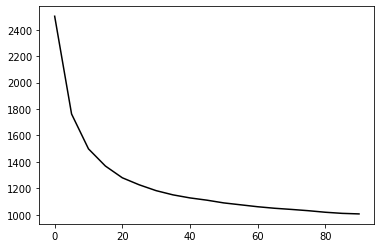

In [21]:
# Evolution de l'erreur sur les visages de test.
lesK = np.arange(0,len(U)+1,5)
merrs = []
for K in lesK:
    merr = []
    for x in X_test.T: 
        z = projEigenface(x, mtest, U, K)
        r = reconstruct(z, mtest, U, K)
        e = errorReconstruct(r,x)
        merr.append(e)
    merrs.append(np.mean(merr))
plt.figure()
plt.plot(lesK,merrs, color='black')
plt.show()

# On obtient une évolution inverse par rapport à la somme cumulée calculée sur les valeurs propres.
# A gauche, là où la somme des k valeurs propres ne suffit pas pour dire le modèle adéquat, l'erreur est maximale. 
# Dans ces cas-là, le visage reconstruit ressemble juste au visage moyen (2400/4096 ~ 60% d'erreur).
# Ensuite, elle décroît. Logique : plus les eigenfaces sont nombreuses, plus le modèle est riche, et proche de la réalité : 
# l'erreur tombe au minimum.
# Il reste tout de même une erreur résiduelle d'environ 1000 dans tous les cas 
# - pour la raison explicitée plus haut.

# Exercice 4: reconnaissance de visage et identification

À chaque visage de référence $x_k^{train}$ est associée une identité,
sous la forme d'un numéro $id^{train}(k)$. Nous chercherons dans cette
partie à identifier un visage $x^{test}$ à partir des visages de
référence.

La méthode la plus simple consiste à comparer la projection $z^{test}$
du visage test $x^{test}$ avec la projection $z_k^{train}$ de chaque
image de référence $x_k^{train}$ (voir figure 7). La
dissimilitude entre les deux est quantifiée par la distance dans le
sous-espace $E_k(x^{test})$ :

$$E_k(x^{test}) =||z^{test}-z_k^{train}||_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>
Figure 7: Projection d'une image $J$ sur le sous-espace des visages et comparaison avec un visage de référence $I_k$, dans le cas $K=2$.
<center>

En évaluant cette distance pour chaque visage de référence, on peut
déterminer le visage de référence $x_k^{train}$ le plus proche du visage
test $x^{test}$. **Son identifiant $id^{train}(k)$ permet alors la
reconnaissance du visage de test.**


1.  Quel est l'intérêt de calculer la distance $E_k(x^{test})$ dans le
    sous-espace des visages plutôt que dans l'espace de départ ?


Calculer la distance dans le sous-espace des visages permet d'ancrer le raisonnement dans le repère qui nous intéresse. On réduit ainsi les dimensions, très nombreuses dans l'espace de départ, pour alléger le calcul et rendre l'ensemble plus cohérent : calculer une erreur dans l'"absolu" alors qu'on sait (ou qu'on suppose) qu'il s'agit de visages, c'est se donner une peine inutile, et devoir potentiellement manipuler de très grandes valeurs alors qu'elles sont en fait centrées.

2.  Mettre au point une fonction
    `D = calculMatDist(Xc_train,Xc_test,W,K)`, qui à partir de
    l'ensemble des images centrées d'apprentissage
    ($\mathbf X_c^{train}$, taille $d \times N_{train}$), de l'ensemble
    des images centrées de test ($\mathbf X_c^{test}$, taille
    $d \times N_{test}$), des eigenfaces $\mathbf W$ et de leur nombre
    conservé $K$ calcule la matrice de distance entre les visages de
    test et de train (taille $N_{test} \times N_{train}$).



In [22]:
def calculMatDist(X_train, X_test, W, K):
    # Matrice des distances pour les images centrées de test et de train.
    matDist = np.zeros(((X_test.T).shape[0],(X_train.T).shape[0]))
    mtrain = meanFaces(X_train.T) 
    mtest = meanFaces(X_test.T) 
    for i in range((X_train.T).shape[0]):
        for j in range((X_test.T).shape[0]):
            z_train = projEigenface(X_train.T[i],mtrain,W,K)
            z_test = projEigenface(X_test.T[j],mtest,W,K)
            matDist[j,i] = np.linalg.norm(z_train-z_test,2)
    return matDist

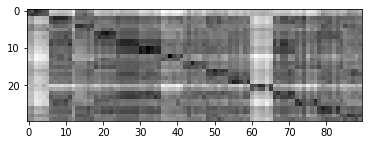

In [23]:
# Application.
matDist = calculMatDist(X_train,X_test,U,len(U))
plt.figure()
plt.imshow(matDist)
plt.show()

3.  Mettre au point une fonction `id_test_hat = identification(D)`, qui
    à partir de la matrice des distances calcule le vecteur
    $\hat{id}^{test}$ de taille $N_{test}$ donnant l'indice du visage de
    train le plus proche de chaque visage de test.



In [24]:
def identification(D, id_train):
    # Reconnaître des visages nouveaux en fonction de la base d'apprentissage : distance minimale dans la matrice.
    max_proj = np.argmin(D, axis=1)
    return np.array([id_train[rang_image] for rang_image in max_proj])

4.  Dans le script principal, calculer pour $K=30$ le taux
    d'identification en comparant $\hat{id}^{test}$ aux labels
    $id^{test}$. Faire ensuite varier $K$, et tracer la courbe du nombre
    de visages reconnus en fonction de $K$. Expliquer la forme de la
    courbe obtenue. Quelle valeur de $K$ peut-on prendre pour avoir une
    bonne reconnaissance et un temps de calcul faible ?

In [25]:
# Taux d'identification pour K = 30.
D = calculMatDist(X_train,X_test,U,30)
p = identification(D, id_train)
print("Prédictions: ", p)
print("Données réelles: ", id_test)
t = p == id_test
t = np.where(t == True, 1, 0)
t = t.sum()/t.size*100
print("Pourcentage de reconnaissance:",t,"%")

Prédictions:  [ 0  0  1 11  2  2  3  3  4  4  5  5  6  6  7  3  8  8  9  9 10 10 11  5
 12 12 13 13 14 14]
Données réelles:  [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14]
Pourcentage de reconnaissance: 90.0 %


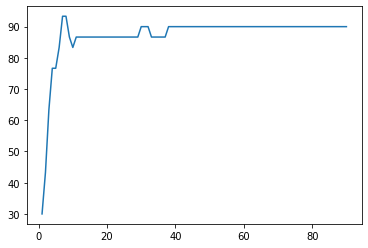

In [27]:
# Taux d'identification en fonction de K.
# Lenteur un peu exagérée.
lesK = np.arange(1,len(U)+1,1)
taux = []
for k in lesK:
    D = calculMatDist(X_train,X_test,U,k)
    id_test_pred = identification(D, id_train)
    t = id_test_pred == id_test
    t = np.where(t==True,1,0)
    taux.append(t.sum()/t.size*100)
plt.figure()
plt.plot(lesK,taux)
plt.show()

La courbe est globalement croissante, les performances s'améliorent avec le nombre d'eigenfaces utilisées. Par contre, elle n'est pas très lisse. On observe notamment un pic pour K = 6-7-8 : c'est un K qui permet d'obtenir un très bon score de reconnaissance pour un temps de calcul minime (comparé à 90).  

On sait que les visages de la base ont huit expressions possibles. Il ne sert donc de rien d'ajouter des dimensions supplémentaires (cela peut prêter à confusion), et il est peu intelligent d'en utiliser moins, puisque le chiffre de 8 est facile à atteindre et rendu public. L'identité de chaque individu est faite d'un peu de sourire, d'un peu de lunettes, d'un peu de clin d'oeil, etc., et cette liste est finie et comporte huit éléments.
La reconnaissance sera donc optimale lorsqu'on a les huit eigenfaces correspondantes en main.

5.  **Bonus** : pour $K=30$, calculez pour chaque visage du
    jeu de référence sa distance dans le sous-espace par rapport à
    l'ensemble des visages de référence. On pourra par exemple
    visualiser le résultat sous la forme d'une image de matrice. Que
    constate-t-on ?

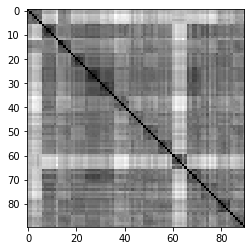

In [28]:
# Matrice des distances internes au jeu de train.
matDist2 = calculMatDist(X_train,X_train,U,len(U))
plt.figure()
plt.imshow(matDist2)
plt.show()

On constate d'abord la symétrie qu'on attend d'une matrice des distances. Tous les visages ont une similarité maximale avec eux-mêmes (rassurant).  

Cependant, certains sont vraiment uniques, et ne partagent presque aucun trait commun avec les autres. Sur la matrice, on les repère comme des carrés sombres à l'intersection de bandes très claires : donc, similarité minimale avec les autres visages, alors que le carré sombre correspond aux multiples photos d'un même individu. C'est le cas pour la première et pour la onzième personne.  
Les personnes 5 et 6, elles, se ressemblent apparemment beaucoup (masse sombre lignes/colonnes 5-6 autour de la diagonale).
Quelques affichages pour s'en convaincre :

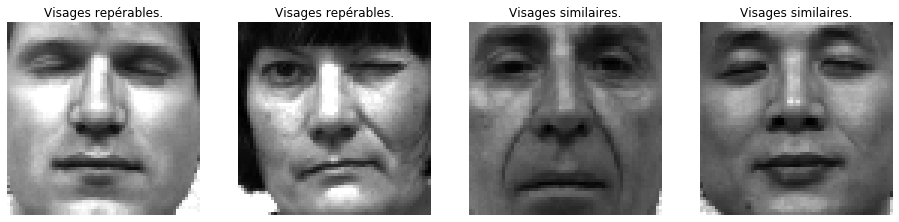

In [29]:
images = []
titles = []
# Une petite idée des quatre visages cités :
images.append(deflat(X_train.T[4])) # personne n°1 : un type un peu différent des autres
images.append(deflat(X_train.T[65])) # personne n°11 : le seul visage féminin (cheveux, etc.)
titles.append("Visages repérables.") 
titles.append("Visages repérables.")
images.append(deflat(X_train.T[26])) # personne n°5 : pour 5 et 6, similarité des teintes en général
images.append(deflat(X_train.T[33])) # personne n°6 : même si ce n'est pas évident pour un humain
titles.append("Visages similaires.")
titles.append("Visages similaires.")
afficheImages(images,titles)

6. **Bonus** : Quelles sont les distances min et max entre deux visages de la même classe (même personne) ? Entre deux visages de classes différentes ? Si on veut mettre en place un seuil $\theta$ pour détecter la présence d'un visage  inconnu, quelles indications nous apportent les valeurs min/max précédentes ?

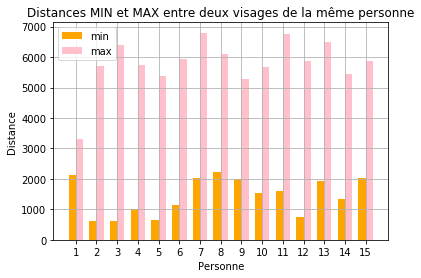

In [30]:
# Quelles sont les distances min et max entre deux visages de la même classe (même personne) ?
min_classes = []
max_classes = []
classes_bounds = np.repeat(np.arange(0,91,6),2)[1:-1].reshape(15,2)
for bounds in classes_bounds:
    lower = bounds[0]
    upper = bounds[1]
    # Extraire toutes les valeurs de distances pour cette classe.
    tri_elems = matDist2[lower:upper,lower:upper][np.triu_indices(6,k=1)] # k=1: pas d'éléments diagonaux
    carre_elems = matDist2[lower:upper,0:lower].flatten()
    elems = np.union1d(tri_elems,carre_elems) 
    # Retrouver le minimum et le maximum. 
    min_classes.append(np.amin(elems))
    max_classes.append(np.amax(elems))
                    
# Affichage
personnes = np.arange(1,16,1)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(personnes-width/2, min_classes, width, label='min', color='orange')
rects2 = ax.bar(personnes+width/2, max_classes, width, label='max', color='pink')
ax.set_ylabel('Distance')
ax.set_xlabel('Personne')
ax.set_title('Distances MIN et MAX entre deux visages de la même personne')
ax.set_xticks(personnes)
ax.grid()
ax.legend()
plt.show()

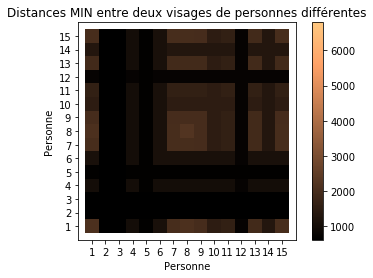

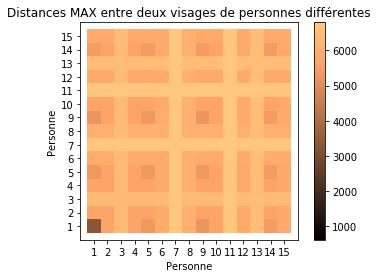

In [31]:
# Quelles sont les distances min et max entre deux visages de classes différentes ?
N = 15 # 15 classes (identités) disponibles 
m = np.zeros((N,N,2)) 
for i in range(N):
    for j in range(N):
        m[i,j,0] = np.amin([min_classes[i],min_classes[j]])
        m[i,j,1] = np.amax([max_classes[i],max_classes[j]])
m_min = m[:,:,0]
m_max = m[:,:,1]

# Extrema globaux
vmax = np.amax(m_max) 
vmin = np.amin(m_min)

# Matrice des distances minimales
fig, ax = plt.subplots()
im = ax.imshow(m_min, cmap=plt.get_cmap('copper'), interpolation='nearest',vmin=vmin , vmax=vmax)
fig.colorbar(im)
ax.set_title('Distances MIN entre deux visages de personnes différentes')
ax.set_ylabel('Personne')
ax.set_xlabel('Personne')
ax.set_ylim(-1, 15)
ax.set_xlim(-1, 15)
ax.set_xticks(np.arange(0, 15, 1))
ax.set_yticks(np.arange(0, 15, 1))
ax.set_xticklabels(personnes)
ax.set_yticklabels(personnes)
plt.show()

# Matrice des distances maximales
fig, ax = plt.subplots()
im = ax.imshow(m_max, cmap=plt.get_cmap('copper'), interpolation='nearest', vmin=vmin, vmax=vmax)
fig.colorbar(im)
ax.set_title('Distances MAX entre deux visages de personnes différentes')
ax.set_ylabel('Personne')
ax.set_xlabel('Personne')
ax.set_ylim(-1, 15)
ax.set_xlim(-1, 15)
ax.set_xticks(np.arange(0, 15, 1))
ax.set_yticks(np.arange(0, 15, 1))
ax.set_xticklabels(personnes)
ax.set_yticklabels(personnes)
plt.show()

# Exercice 5: classification visage/non visage

Jusqu'à présent, nous nous sommes attachés à comparer des images de
visage entre elles. Mais la méthode fournit des informations que nous
n'avons pas encore utilisées. En particulier, l'erreur de reconstruction
peut être utilisée pour vérifier qu'une image est bien une image de
visage. Lorsqu'une image contient autre chose qu'un visage (image de
fleur, une personne vue en entier, une image aléatoire\...), nous dirons
qu'il s'agit d'un non-visage (base *noface*).


![figure8](./figs/Figure_8.png)
<center>Figure 8: illustration des cas possibles de classification d'une image : cas
1,2) $Z$ proche du sous-espace : il s'agit d'un visage cas 3,4) $Z$ loin du
sous-espace : il ne s'agit pas d'un visage cas 1) Z visage identifié cas
2) $Z$ visage inconnu cas 3) risque d'identifier $Z$ avec un visage alors
qu'il n'en est pas un.</center>



1.  Calculer l'erreur de reconstruction des images de la base et des
    images de test de la base visages (pour $K=30$), et tracer la courbe
    de l'erreur dans les 2 cas. Calculer l'erreur moyenne dans les deux
    cas, ainsi que l'erreur min pour les non-visages, et l'erreur max
    pour les visages. Quel conclusion pouvez-vous en tirer ?

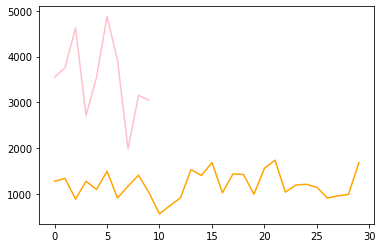

Erreur moyenne sur les visages: 1203.1290086521908
Erreur moyenne sur les non-visages: 3519.3049355664234
Erreur minimale sur les visages: 565.5035106990132
Erreur minimale sur les non-visages 1984.830272590635 #a
Erreur maximale sur les visages: 1738.3672838507691 #b
Erreur maximale sur les non-visages: 4882.099590924444


In [32]:
eno = np.zeros((10))
etest = np.zeros((30))
k = 30
for i in range(10):
    x = X_noface[:,i]
    z = projEigenface(x,mtrain,U,k)
    r = reconstruct(z,mtrain,U,k)
    eno[i] = errorReconstruct(x,r)
for i in range(30): 
    x = X_test[:,i]
    z = projEigenface(x,mtrain,U,k)
    r = reconstruct(z,mtrain,U,k)
    etest[i] = errorReconstruct(x,r)
    
plt.plot(eno, color = 'pink'); # Erreur des non-visages.
plt.plot(etest, color = 'orange'); # Erreur des visages de test.
plt.show()

print("Erreur moyenne sur les visages:", np.mean(etest))
print("Erreur moyenne sur les non-visages:", np.mean(eno))
print("Erreur minimale sur les visages:", np.amin(etest))
print("Erreur minimale sur les non-visages", np.amin(eno), "#a")
# la relation est à constater entre ces deux lignes
print("Erreur maximale sur les visages:", np.amax(etest), "#b")
print("Erreur maximale sur les non-visages:", np.amax(eno))

# Il y a une différence de facteur 3 entre les moyennes pour les deux ensembles.
# Surtout, l'erreur minimale sur les non-visages (a) reste toujours bien plus grande que l'erreur maximale (b) sur les visages. 
# Il est possible de l'utiliser comme facteur discriminant : un objet n'est pas un visage si l'erreur
# sur la reconstruction par eigenfaces dépasse un certain seuil, mettons la moyenne entre les deux.

2.  Visualiser l'erreur de reconstruction en affichant l'image originale
    et l'image reconstruite pour 10 images de la base de visages, et
    pour les 10 images de la base de non-visages. Commentaire ?

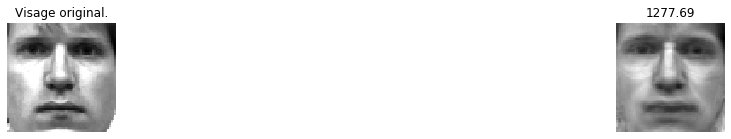

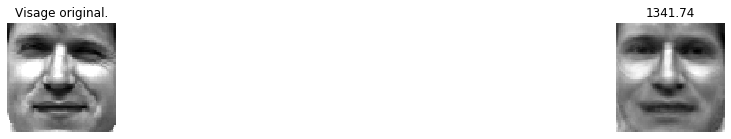

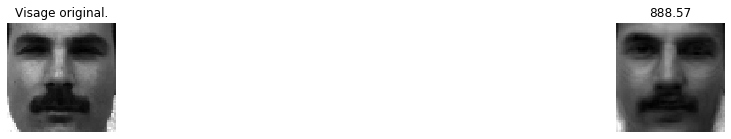

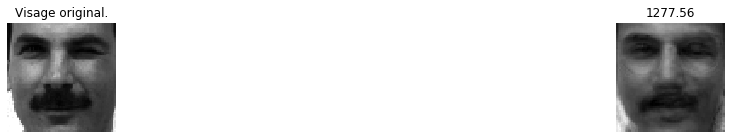

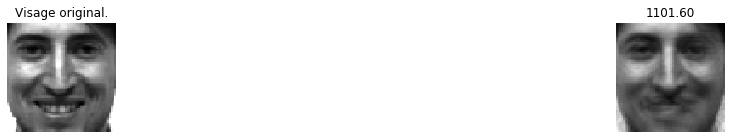

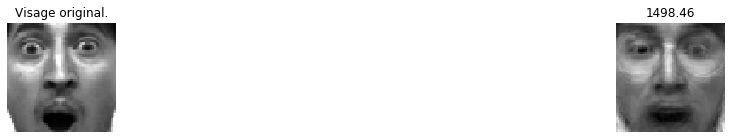

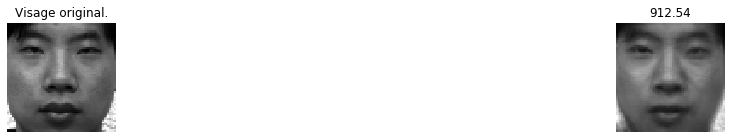

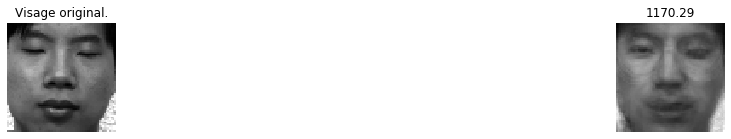

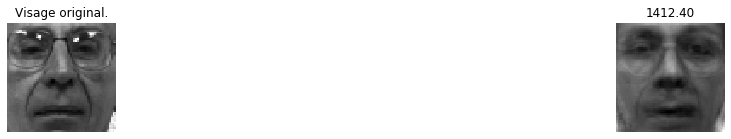

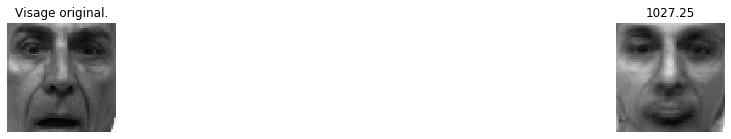

In [33]:
# Preuves visuelles.
# Dix visages de test.
for i in range(10):
    x = X_test[:,i]
    affiche_Reconstruction(x, mean, U, [30])
plt.show()

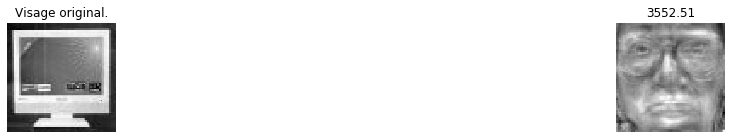

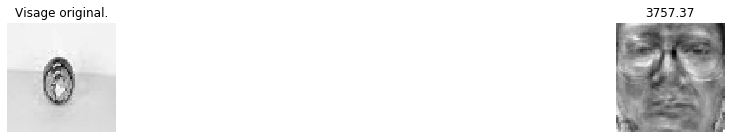

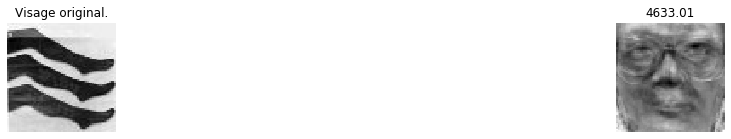

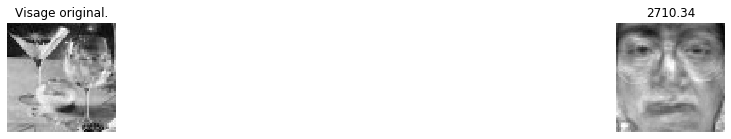

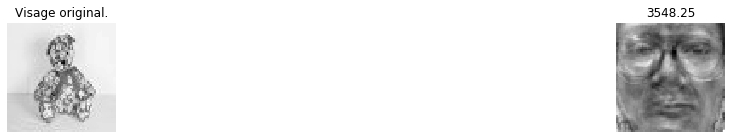

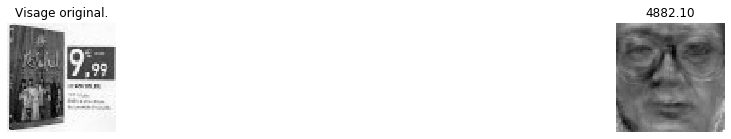

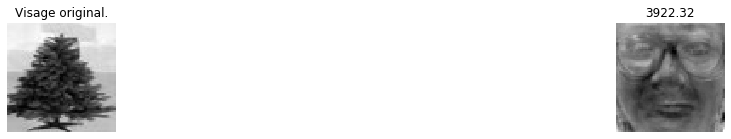

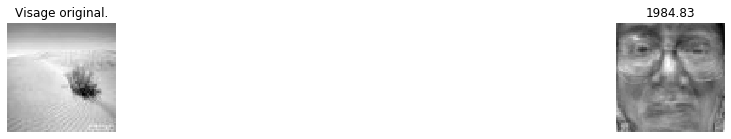

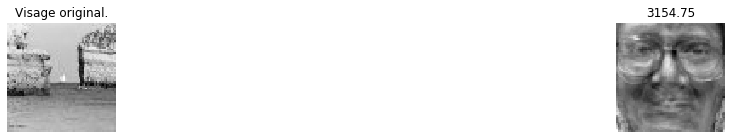

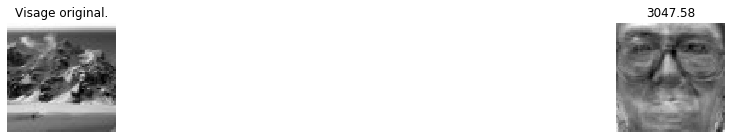

In [34]:
# Preuves visuelles.
# Base restreinte de non-visages.
for i in range(10):
    x = X_noface[:,i]
    affiche_Reconstruction(x, mean, U, [30])
plt.show()

On constate bien que les eigenfaces ne sont pas utiles sur des non-visages.  
Les visages de test et les visages reconstruits se ressemblent bien, quoique le résultat n'est pas optimal comparé à ce qu'on obtenait sur le jeu d'apprentissage ; par contre, les reconstructions des non-visages ont un air de film d'horreur.
Forcer la reconnaissance alors que l'image est trop loin du sous-espace concerné donne des résultats douteux.